In [1]:
import pandas as pd
import requests
import os
from pathlib import Path
import os.path
from statsmodels.formula.api import *
import matplotlib.pyplot as plt
from sklearn import linear_model
from ggplot import *

In [2]:
reviews_df = pd.read_csv("../1_collect_data/planet_terp_data/PT_review_data.csv")
grades_df = pd.read_csv("../1_collect_data/planet_terp_data/PT_grade_data.csv")

In [3]:
average_reviews_df = pd.DataFrame()
classes = {}
count = 0
curr_prof = reviews_df.at[0, "name"]
curr_slug = reviews_df.at[0, "slug"]
for index, row in reviews_df.iterrows():
    if reviews_df.at[index, "name"] == curr_prof:
        if reviews_df.at[index, "course"] in classes:
            classes[reviews_df.at[index, "course"]] = [classes.get(reviews_df.at[index, "course"])[0] + reviews_df.at[index, "rating"], 
                                                       classes.get(reviews_df.at[index, "course"])[1] + 1]
        else:
            classes[reviews_df.at[index, "course"]] = [reviews_df.at[index, "rating"],1]
    else:
        for i in classes.keys():
            average_reviews_df.at[count, "name"] = curr_prof
            average_reviews_df.at[count, "course"] = i
            average_reviews_df.at[count, "slug"] = curr_slug
            average_reviews_df.at[count, "average_rating"] = classes.get(i)[0]/classes.get(i)[1]
            average_reviews_df.at[count, "num_ratings"] = classes.get(i)[1]
            count = count + 1
        classes = {}
        curr_prof = reviews_df.at[index, "name"]
        curr_slug = reviews_df.at[index, "slug"]

average_reviews_df


,name,course,slug,average_rating,num_ratings
0,A Anthony,AMST203,anthony,1.000000,1.0
1,A Sharma,ASTR300,sharma_a,1.750000,4.0
2,A.U. Shankar,CMSC216,shankar_a.u.,2.222222,18.0
3,A.U. Shankar,CMSC412,shankar_a.u.,3.200000,5.0
4,Aaron Bartlett,ENGL265,bartlett,2.000000,3.0
...,...,...,...,...,...
4169,Zita Nunes,AASP298L,nunes_zita,3.000000,1.0
4170,Zita Nunes,ENGL234,nunes_zita,4.000000,2.0
4171,Zoe Copeman,ARTH201,copeman_zoe,3.600000,5.0
4172,Zohreh Davoudi,PHYS411,davoudi,1.666667,3.0


In [4]:
average_grades_df = pd.DataFrame()
classes = {}
gpa = {"A+":4.0, "A":4.0, "A-":3.7,"B+":3.3, "B":3.0, "B-":2.7, "C+":2.3, "C":2.0, "C-":1.7, "D+":1.3, "D":1.0, "D-":0.7, "F":0.0}
count = 0
curr_prof = grades_df.at[0, "professor"]
for index, row in grades_df.iterrows():
    curr_gpa = [0, 0]
    for i in gpa.keys():
        curr_gpa[0] = curr_gpa[0] + gpa.get(i)*grades_df.at[index, i]
        curr_gpa[1] = curr_gpa[1] + grades_df.at[index, i]
    if grades_df.at[index, "professor"] == curr_prof:
        if grades_df.at[index, "course"] in classes:
            classes[grades_df.at[index, "course"]] = [classes.get(grades_df.at[index, "course"])[0] + curr_gpa[0], 
                                                      classes.get(grades_df.at[index, "course"])[1] + curr_gpa[1]]
        else:
            classes[grades_df.at[index, "course"]] = curr_gpa
    else:
        for i in classes.keys():
            if classes.get(i)[1] != 0:
                average_grades_df.at[count, "name"] = curr_prof
                average_grades_df.at[count, "course"] = i
                average_grades_df.at[count, "average_gpa"] = (classes.get(i)[0])/(classes.get(i)[1])
                average_grades_df.at[count, "num_students"] = classes.get(i)[1]
                count = count + 1
        classes = {}
        curr_prof = grades_df.at[index, "professor"]

average_grades_df

,name,course,average_gpa,num_students
0,A Anthony,AMST202,2.693617,47.0
1,A Anthony,AMST203,2.914130,92.0
2,A Kruglanski,PSYC489H,3.550000,8.0
3,A Kruglanski,PSYC489T,3.561702,94.0
4,A Kruglanski,PSYC604,3.544828,29.0
...,...,...,...,...
14475,Zohreh Davoudi,PHYS604,3.503636,55.0
14476,Zohreh Davoudi,PHYS624,3.565517,29.0
14477,Zsuzsa Daczo,SOCY105,3.783108,592.0
14478,Zsuzsa Daczo,SOCY227,3.698433,319.0


In [5]:
both_averages_df = pd.merge(
    average_reviews_df,
    average_grades_df,
    how = "inner",
    on = ["name", "course"]
)

both_averages_df

,name,course,slug,average_rating,num_ratings,average_gpa,num_students
0,A Anthony,AMST203,anthony,1.000000,1.0,2.914130,92.0
1,A Sharma,ASTR300,sharma_a,1.750000,4.0,2.964706,221.0
2,A.U. Shankar,CMSC216,shankar_a.u.,2.222222,18.0,2.357948,692.0
3,A.U. Shankar,CMSC412,shankar_a.u.,3.200000,5.0,2.809319,279.0
4,Aaron Bartlett,ENGL265,bartlett,2.000000,3.0,3.296552,29.0
...,...,...,...,...,...,...,...
3495,Zhi Xiang Lin,HACS200,lin_zhi_xiang,2.500000,2.0,3.872727,33.0
3496,Zhongchi Liu,BSCI410,liu_zhongchi,4.714286,7.0,3.433214,557.0
3497,Zita Nunes,ENGL234,nunes_zita,4.000000,2.0,2.562766,94.0
3498,Zohreh Davoudi,PHYS411,davoudi,1.666667,3.0,2.772093,43.0


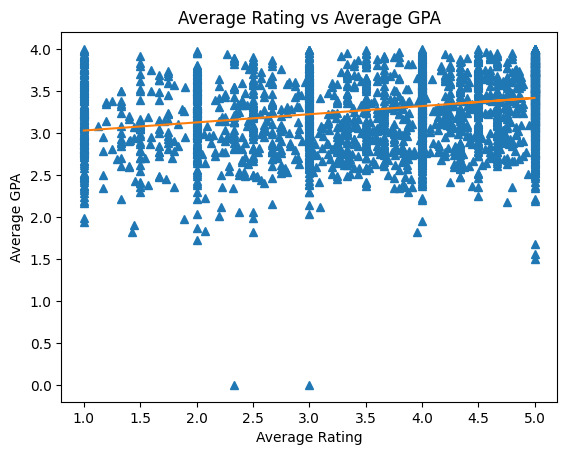

In [6]:
x = both_averages_df["average_rating"]
y = both_averages_df["average_gpa"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in both_averages_df["average_rating"].values]
y_train = [[y] for y in both_averages_df["average_gpa"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Rating vs Average GPA")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.show()

In [7]:
# getting rid of professor/class combinations with less than 5 reviews

five_or_more_df = pd.DataFrame()
count = 0

for index, row in both_averages_df.iterrows():
    if both_averages_df.at[index, "num_ratings"] >= 5:
        five_or_more_df.at[count, "name"] = both_averages_df.at[index, "name"]
        five_or_more_df.at[count, "slug"] = both_averages_df.at[index, "slug"]
        five_or_more_df.at[count, "course"] = both_averages_df.at[index, "course"]
        five_or_more_df.at[count, "average_rating"] = both_averages_df.at[index, "average_rating"]
        five_or_more_df.at[count, "num_ratings"] = both_averages_df.at[index, "num_ratings"]
        five_or_more_df.at[count, "average_gpa"] = both_averages_df.at[index, "average_gpa"]
        five_or_more_df.at[count, "num_students"] = both_averages_df.at[index, "num_students"]
        count = count + 1

five_or_more_df

,name,slug,course,average_rating,num_ratings,average_gpa,num_students
0,A.U. Shankar,shankar_a.u.,CMSC216,2.222222,18.0,2.357948,692.0
1,A.U. Shankar,shankar_a.u.,CMSC412,3.200000,5.0,2.809319,279.0
2,Aaron Finkle,finkle,ECON306,2.500000,8.0,2.706983,2678.0
3,Aaron Swanlek,swanlek,COMM107,5.000000,7.0,3.938579,394.0
4,Abigail Nicolas,nicolas_abigail,PSYC221,5.000000,8.0,3.557846,325.0
...,...,...,...,...,...,...,...
823,Zachary Dorner,dorner,HNUH258X,5.000000,9.0,3.826582,79.0
824,Zachary Greenberg,greenberg_zachary,MATH140,2.600000,5.0,2.402976,168.0
825,Zeinab Karake,karake,BMGT301,3.800000,10.0,3.222812,4090.0
826,Zeinab Karake,karake,BMGT301F,2.363636,11.0,3.345942,1454.0


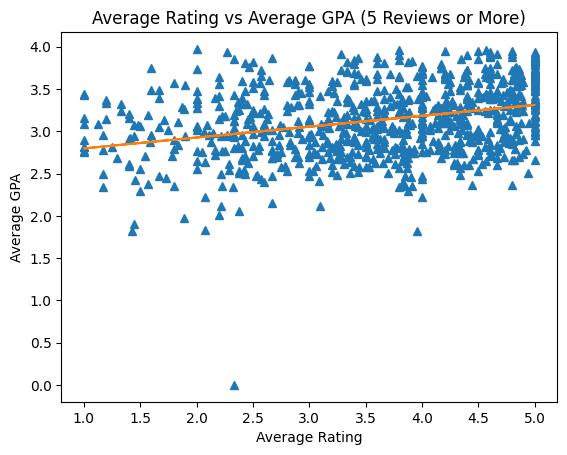

In [8]:
x = five_or_more_df["average_rating"]
y = five_or_more_df["average_gpa"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in five_or_more_df["average_rating"].values]
y_train = [[y] for y in five_or_more_df["average_gpa"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Rating vs Average GPA (5 Reviews or More)")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.show()

In [9]:
for index, row in five_or_more_df.iterrows():
    five_or_more_df.at[index, "department"] = five_or_more_df.at[index, "course"][:4]

five_or_more_df

,name,slug,course,average_rating,num_ratings,average_gpa,num_students,department
0,A.U. Shankar,shankar_a.u.,CMSC216,2.222222,18.0,2.357948,692.0,CMSC
1,A.U. Shankar,shankar_a.u.,CMSC412,3.200000,5.0,2.809319,279.0,CMSC
2,Aaron Finkle,finkle,ECON306,2.500000,8.0,2.706983,2678.0,ECON
3,Aaron Swanlek,swanlek,COMM107,5.000000,7.0,3.938579,394.0,COMM
4,Abigail Nicolas,nicolas_abigail,PSYC221,5.000000,8.0,3.557846,325.0,PSYC
...,...,...,...,...,...,...,...,...
823,Zachary Dorner,dorner,HNUH258X,5.000000,9.0,3.826582,79.0,HNUH
824,Zachary Greenberg,greenberg_zachary,MATH140,2.600000,5.0,2.402976,168.0,MATH
825,Zeinab Karake,karake,BMGT301,3.800000,10.0,3.222812,4090.0,BMGT
826,Zeinab Karake,karake,BMGT301F,2.363636,11.0,3.345942,1454.0,BMGT


In [10]:
# dep_gpas = {}
# dep_gpas_df = pd.DataFrame()

# for index, row in five_or_more_df.iterrows():
#     if five_or_more_df.at[index, "department"] in dep_gpas:
#         dep_gpas[five_or_more_df.at[index, "department"]] = [dep_gpas.get(five_or_more_df.at[index, "department"])[0] + 
#                                                              five_or_more_df.at[index, "average_gpa"]*five_or_more_df.at[index, "num_students"],
#                                                              dep_gpas.get(five_or_more_df.at[index, "department"])[1] +five_or_more_df.at[index, "num_students"]]
#     else:
#         dep_gpas[five_or_more_df.at[index, "department"]] = [five_or_more_df.at[index, "average_gpa"]*five_or_more_df.at[index, "num_students"],
#                                                              five_or_more_df.at[index, "num_students"]]

# count = 0
# for i in dep_gpas:
#     dep_gpas_df.at[count, "department"] = i
#     dep_gpas_df.at[count, "average_gpa"] = dep_gpas.get(i)[0]/dep_gpas.get(i)[1]
#     dep_gpas_df.at[count, "total_students"] = dep_gpas.get(i)[1]
#     count = count + 1

# dep_gpas_df


In [11]:
for index, row in average_grades_df.iterrows():
    average_grades_df.at[index, "department"] = average_grades_df.at[index, "course"][:4]

average_grades_df

,name,course,average_gpa,num_students,department
0,A Anthony,AMST202,2.693617,47.0,AMST
1,A Anthony,AMST203,2.914130,92.0,AMST
2,A Kruglanski,PSYC489H,3.550000,8.0,PSYC
3,A Kruglanski,PSYC489T,3.561702,94.0,PSYC
4,A Kruglanski,PSYC604,3.544828,29.0,PSYC
...,...,...,...,...,...
14475,Zohreh Davoudi,PHYS604,3.503636,55.0,PHYS
14476,Zohreh Davoudi,PHYS624,3.565517,29.0,PHYS
14477,Zsuzsa Daczo,SOCY105,3.783108,592.0,SOCY
14478,Zsuzsa Daczo,SOCY227,3.698433,319.0,SOCY


In [12]:
# departments = five_or_more_df["department"].drop_duplicates()

# print(len(departments))

In [13]:
# ggplot(aes(x="department", y="average_gpa"), data=average_grades_df) + geom_boxplot() +\
#     labs(title="Average Gpa for Different Departments",
#          x = "Department",
#          y = "Average GPA")

In [14]:
# dep_gpas_df = dep_gpas_df.sort_values(by = "total_students", ascending = False, ignore_index = True)

# dep_gpas_df

In [15]:
# most_students_dep = []

# for i in range(10):
#     most_students_dep.append(dep_gpas_df.at[i, "department"])

# print(most_students_dep)

In [16]:
# popular_departments_df = pd.DataFrame()

# count = 0

# for index, row in five_or_more_df.iterrows():
#     if five_or_more_df.at[index, "department"] in most_students_dep:
#         popular_departments_df.at[count, "name"] = five_or_more_df.at[index, "name"]
#         popular_departments_df.at[count, "course"] = five_or_more_df.at[index, "course"]
#         popular_departments_df.at[count, "average_rating"] = five_or_more_df.at[index, "average_rating"]
#         popular_departments_df.at[count, "num_ratings"] = five_or_more_df.at[index, "num_ratings"]
#         popular_departments_df.at[count, "average_gpa"] = five_or_more_df.at[index, "average_gpa"]
#         popular_departments_df.at[count, "num_students"] = five_or_more_df.at[index, "num_students"]
#         popular_departments_df.at[count, "department"] = five_or_more_df.at[index, "department"]
#         count = count + 1

# popular_departments_df

In [17]:
# popular_departments_df = popular_departments_df.sort_values(by = "department", ignore_index = False)

# popular_dep = {}
# curr_dep = None
# classes = [[]]
# multi = False
# for index, row in popular_departments_df.iterrows():
#     classes.append([popular_departments_df.at[index, "course"],
#                     popular_departments_df.at[index, "average_rating"],
#                     popular_departments_df.at[index, "num_ratings"],
#                     popular_departments_df.at[index, "average_gpa"],
#                     popular_departments_df.at[index, "num_students"],
#                     popular_departments_df.at[index, "name"]])
#     if popular_departments_df.at[index, "department"] == curr_dep:
#         multi = True
#     else:
#         if multi == True:
#             popular_dep[curr_dep] = classes
#             multi = False
#         classes = []
#         curr_dep = popular_departments_df.at[index, "department"]

# if multi == True:
#     popular_dep[curr_dep] = classes

# popular_departments_df = popular_departments_df.sort_values(by = "name", ignore_index = False)

# print(popular_dep.keys())

In [18]:
# for i in most_students_dep:
#     courses = []
#     ratings = []
#     gpas = []

#     for j in popular_dep.get(i):
#         courses.append(j[0] + " " + j[5])
#         ratings.append(j[1])
#         gpas.append(j[3])

#     for j in range(len(courses)):
#         plt.plot(ratings[j], gpas[j], "^", label = courses[j])

#     plt.title("Average Rating vs Average GPA (" + i + ")")
#     plt.ylabel("Average GPA")
#     plt.xlabel("Average Rating")
#     plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
#     # ADD LINEAR REGRESSION
#     plt.xlim(0.5, 5.5)
#     plt.ylim(-0.5, 4.5)
#     plt.show()

In [19]:
# ggplot(aes(x="department", y="average_gpa"), data=popular_departments_df) + geom_boxplot() +\
#     labs(title="Average Gpa for Departments with the Most Students",
#          x = "Department",
#          y = "Average GPA")

In [20]:
# ggplot(aes(x="department", y="average_rating"), data=popular_departments_df) + geom_boxplot() +\
#     labs(title="Average Rating for Departments with the Most Students",
#          x = "Department",
#          y = "Average Rating")

In [21]:
multi_prof = {}
curr_prof = None
classes = [[]]
multi = False
for index, row in five_or_more_df.iterrows():
    classes.append([five_or_more_df.at[index, "course"],
                    five_or_more_df.at[index, "average_rating"],
                    five_or_more_df.at[index, "num_ratings"],
                    five_or_more_df.at[index, "average_gpa"],
                    five_or_more_df.at[index, "num_students"],
                    five_or_more_df.at[index, "department"]])
    if five_or_more_df.at[index, "name"] == curr_prof:
        multi = True
    else:
        if multi == True:
            multi_prof[curr_prof] = classes
            multi = False
        classes = []
        curr_prof = five_or_more_df.at[index, "name"]

print(len(multi_prof.keys()))

137


In [22]:
multi_prof_df = pd.DataFrame()

count = 0
for i in multi_prof.keys():
    multi_prof_df.at[count, "name"] = i
    multi_prof_df.at[count, "num_classes"] = len(multi_prof.get(i))
    count = count + 1

multi_prof_df

,name,num_classes
0,A.U. Shankar,2.0
1,Agisilaos Iliadis,2.0
2,Alice Mignerey,2.0
3,Alka Gandhi,2.0
4,Allan Yashinski,3.0
...,...,...
132,William Higgins,3.0
133,William McClenahan,3.0
134,Wiseley Wong,3.0
135,Yavuz Oruc,2.0


In [23]:
multi_prof_df = multi_prof_df.sort_values(by = "num_classes", ascending = False, ignore_index = True)

multi_prof_df

,name,num_classes
0,Bonnie Dixon,6.0
1,Timothy Pilachowski,6.0
2,Mestiyage Gunatilleka,5.0
3,Justin Wyss-Gallifent,5.0
4,Nelson Padua-Perez,5.0
...,...,...
132,Jonathan Fernandes,2.0
133,Jonathan England,2.0
134,John Ondov,2.0
135,John Bono,2.0


In [24]:
multi_prof_df["num_classes"].value_counts()

num_classes
2.0    93
3.0    30
4.0     9
5.0     3
6.0     2
Name: count, dtype: int64

In [25]:
most_classes_profs = []

for i in range(14):
    most_classes_profs.append(multi_prof_df.at[i, "name"])

print(most_classes_profs)

['Bonnie Dixon', 'Timothy Pilachowski', 'Mestiyage Gunatilleka', 'Justin Wyss-Gallifent', 'Nelson Padua-Perez', 'Michael Galczynski', 'Ilchul Yoon', 'Christiana Guest', 'Manoussos Grillakis', 'Roohollah Ebrahimian', 'Jeff Miller', 'David Hamilton', 'Jose Calderon', 'Fawzi Emad']


In [26]:
most_classes_profs_df = pd.DataFrame()
count = 0

for index, row in five_or_more_df.iterrows():
    if five_or_more_df.at[index, "name"] in most_classes_profs:
        most_classes_profs_df.at[count, "name"] = five_or_more_df.at[index, "name"]
        most_classes_profs_df.at[count, "course"] = five_or_more_df.at[index, "course"]
        most_classes_profs_df.at[count, "average_rating"] = five_or_more_df.at[index, "average_rating"]
        most_classes_profs_df.at[count, "num_ratings"] = five_or_more_df.at[index, "num_ratings"]
        most_classes_profs_df.at[count, "average_gpa"] = five_or_more_df.at[index, "average_gpa"]
        most_classes_profs_df.at[count, "num_students"] = five_or_more_df.at[index, "num_students"]
        most_classes_profs_df.at[count, "department"] = five_or_more_df.at[index, "department"]
        count = count + 1

most_classes_profs_df

,name,course,average_rating,num_ratings,average_gpa,num_students,department
0,Bonnie Dixon,BCHM463,2.666667,12.0,2.769094,1291.0,BCHM
1,Bonnie Dixon,CHEM131,3.842105,19.0,2.707407,243.0,CHEM
2,Bonnie Dixon,CHEM134,2.166667,6.0,2.723111,225.0,CHEM
3,Bonnie Dixon,CHEM135,3.758621,29.0,2.612654,893.0,CHEM
4,Bonnie Dixon,CHEM231,4.205882,68.0,2.730612,2829.0,CHEM
...,...,...,...,...,...,...,...
58,Timothy Pilachowski,MATH140,2.421053,19.0,2.537509,1437.0,MATH
59,Timothy Pilachowski,MATH141,3.062500,16.0,2.590874,767.0,MATH
60,Timothy Pilachowski,MATH220,3.000000,18.0,2.696318,1168.0,MATH
61,Timothy Pilachowski,MATH221,3.750000,8.0,3.021374,131.0,MATH


In [27]:
# ggplot(aes(x="name", y="average_rating"), data=most_classes_profs_df) + geom_boxplot() +\
#     labs(title="Average Rating for Different Classes Taught by the Same Professor",
#          x = "Professor",
#          y = "Average Rating")

In [28]:
# ggplot(aes(x="name", y="average_gpa"), data=most_classes_profs_df) + geom_boxplot() +\
#     labs(title="Average GPA for Different Classes Taught by the Same Professor",
#          x = "Professor",
#          y = "Average GPA")

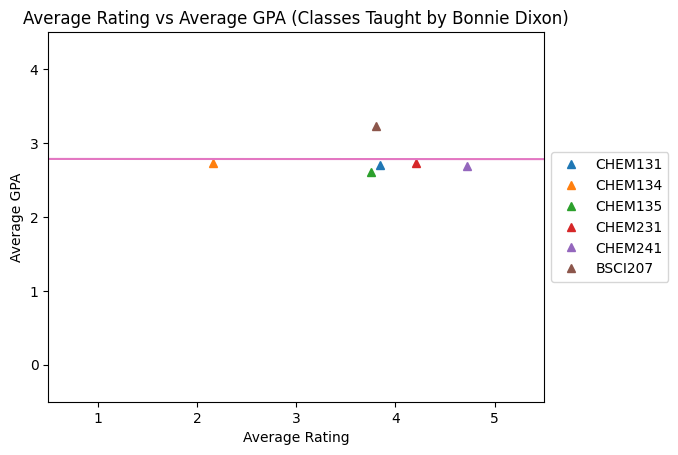

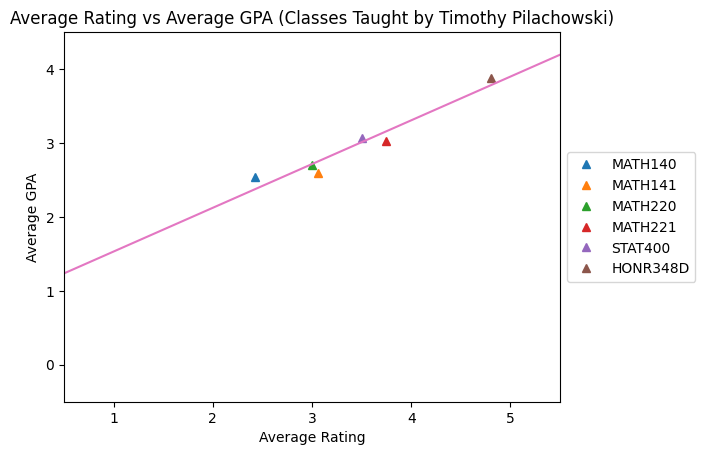

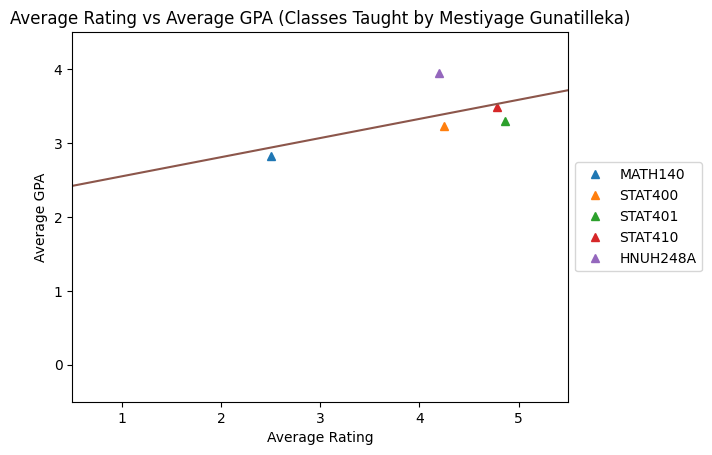

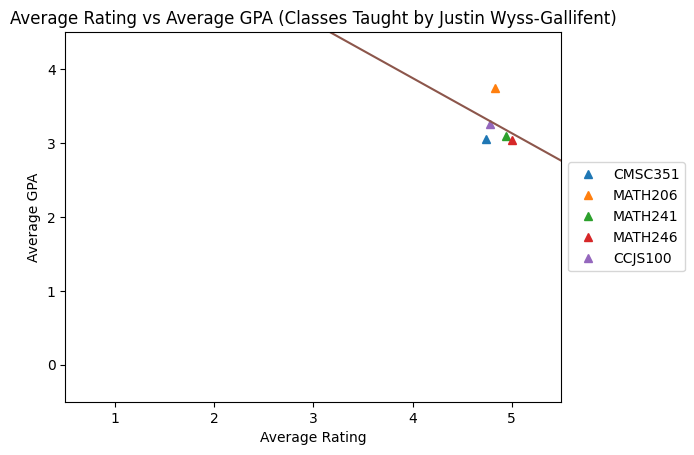

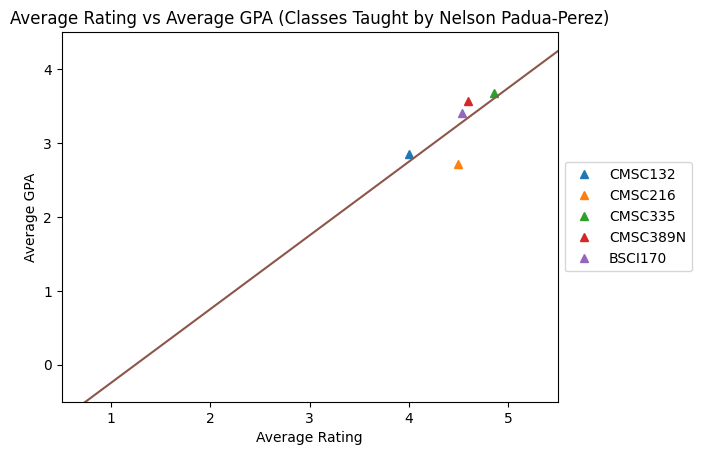

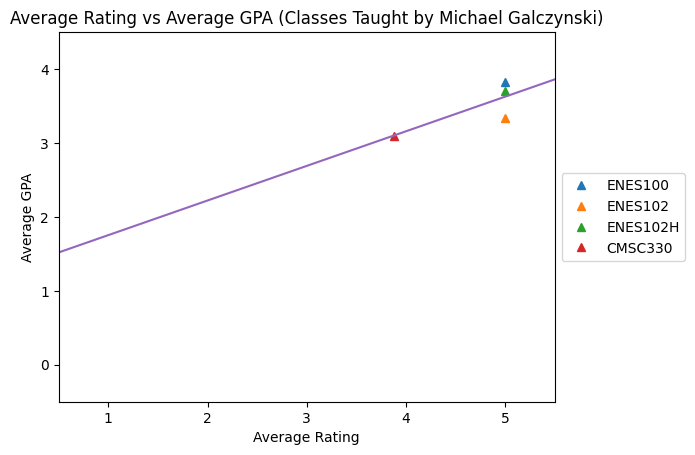

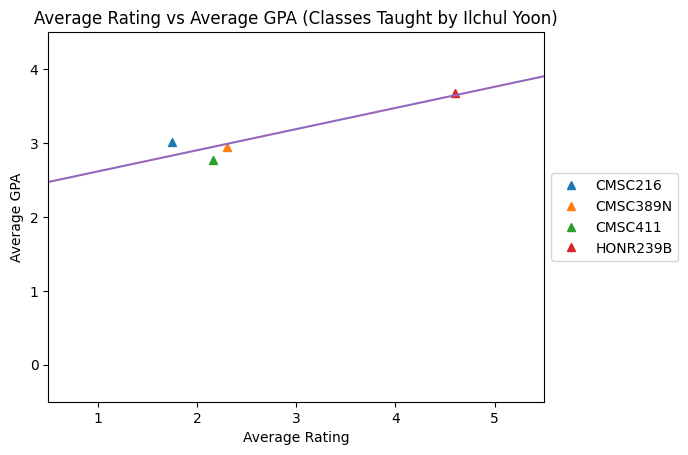

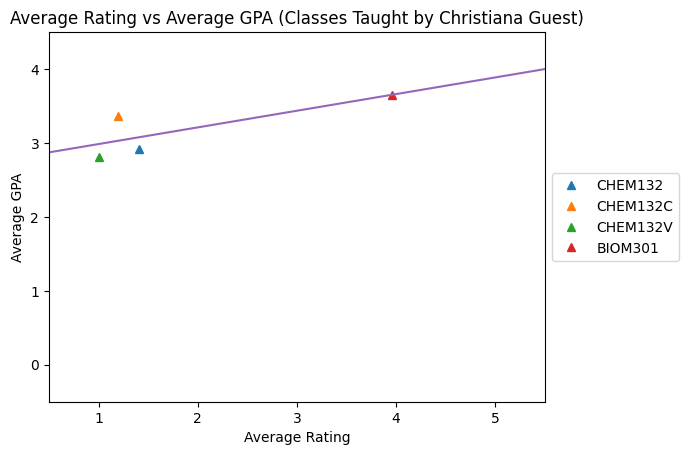

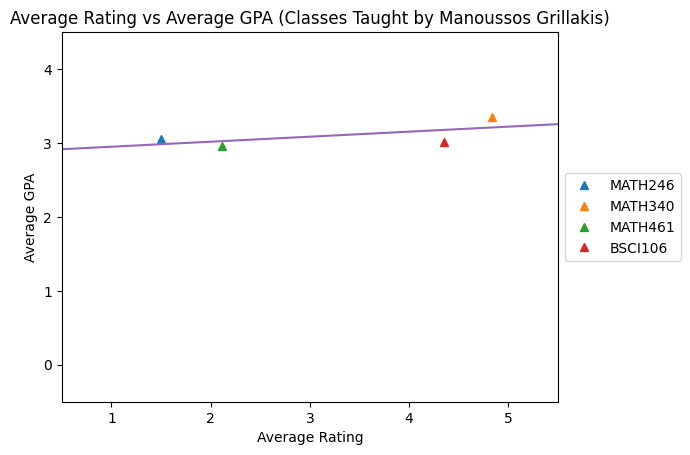

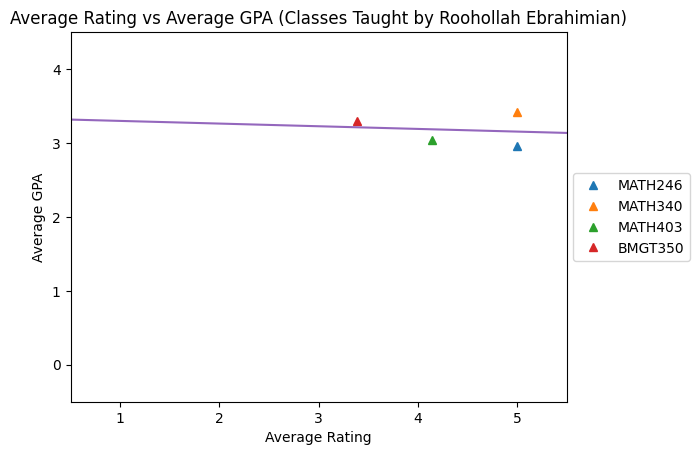

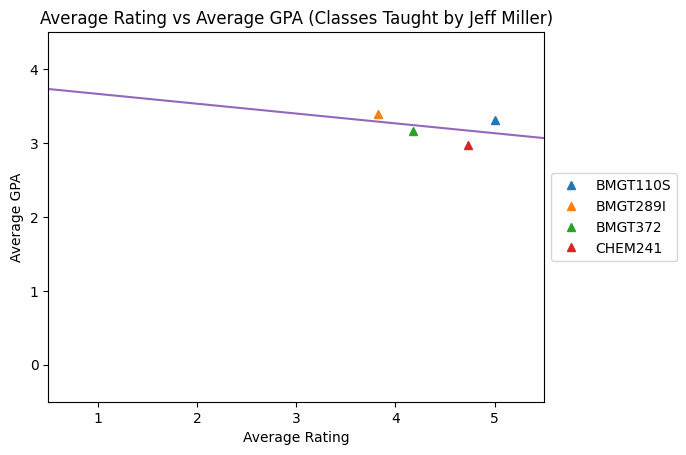

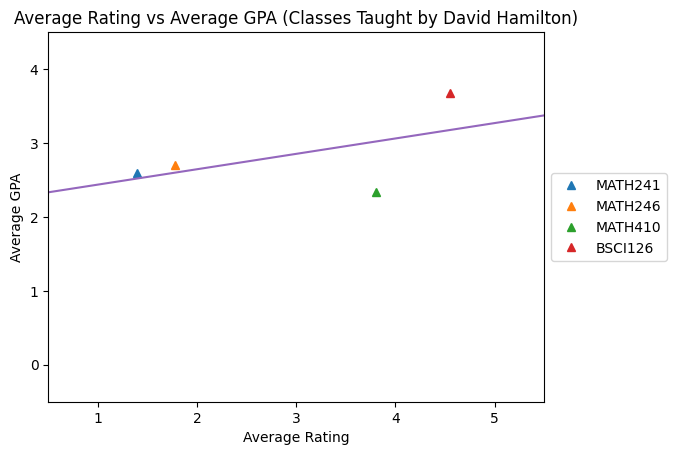

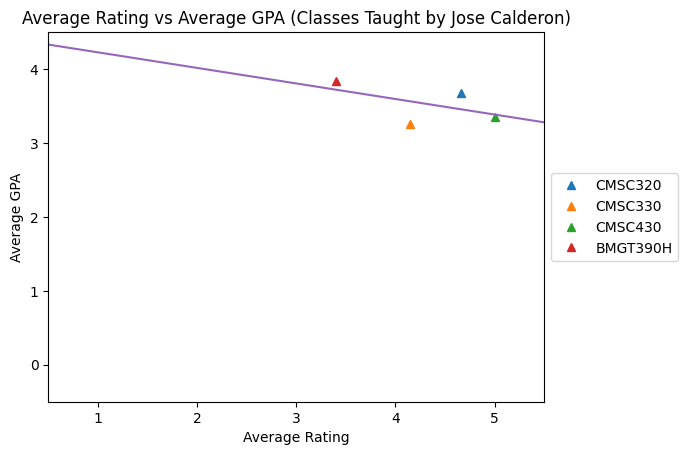

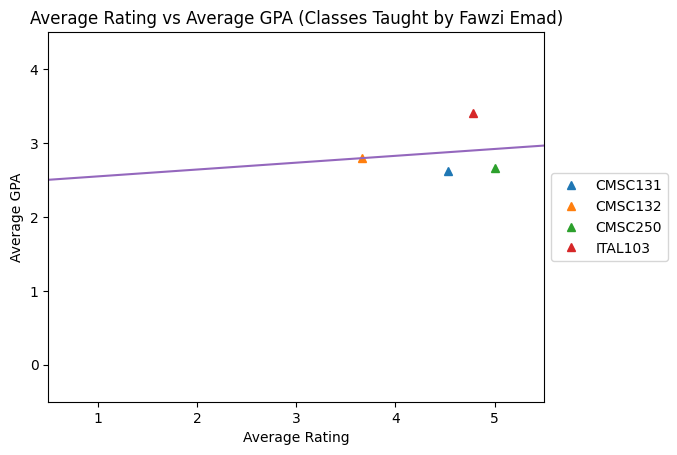

In [29]:
import numpy as np
for i in most_classes_profs:
    courses = []
    ratings = []
    gpas = []

    for j in multi_prof.get(i):
        courses.append(j[0])
        ratings.append(j[1])
        gpas.append(j[3])

    for j in range(len(courses)):
        plt.plot(ratings[j], gpas[j], "^", label = courses[j])

    plt.title("Average Rating vs Average GPA (Classes Taught by " + i + ")")
    plt.ylabel("Average GPA")
    plt.xlabel("Average Rating")
    plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
    ratings = np.array(ratings).reshape(-1, 1)
    reg = linear_model.LinearRegression()
    regfit = reg.fit(ratings, gpas)
    X = np.linspace(-100, 100)
    y_pred = reg.predict(np.array(X).reshape(-1,1))
    plt.plot(X,y_pred)
    plt.xlim(0.5, 5.5)
    plt.ylim(-0.5, 4.5)
    plt.show()

In [30]:
multi_course = {}
curr_course = None
profs = [[]]
multi = False

five_or_more_df = five_or_more_df.sort_values(by = "course", ignore_index = True)


for index, row in five_or_more_df.iterrows():
    profs.append([five_or_more_df.at[index, "name"],
                    five_or_more_df.at[index, "average_rating"],
                    five_or_more_df.at[index, "num_ratings"],
                    five_or_more_df.at[index, "average_gpa"],
                    five_or_more_df.at[index, "num_students"],
                    five_or_more_df.at[index, "department"]])
    if five_or_more_df.at[index, "course"] == curr_course:
        multi = True
    else:
        if multi == True:
            multi_course[curr_course] = profs
            multi = False
        profs = []
        curr_course = five_or_more_df.at[index, "course"]

five_or_more_df = five_or_more_df.sort_values(by = "name", ignore_index = True)

print(len(multi_course.keys()))

153


In [31]:
multi_course_df = pd.DataFrame()

count = 0
for i in multi_course.keys():
    multi_course_df.at[count, "course"] = i
    multi_course_df.at[count, "num_profs"] = len(multi_course.get(i))
    count = count + 1

multi_course_df

,course,num_profs
0,AASP100,2.0
1,ANTH240,2.0
2,AOSC200,2.0
3,AREC365,2.0
4,ARTH200,3.0
...,...,...
148,PSYC221,3.0
149,SOCY100,3.0
150,STAT100,3.0
151,STAT400,12.0


In [32]:
multi_course_df = multi_course_df.sort_values(by = "num_profs", ascending = False, ignore_index = True)

multi_course_df

,course,num_profs
0,MATH141,14.0
1,MATH241,13.0
2,MATH246,12.0
3,STAT400,12.0
4,COMM107,12.0
...,...,...
148,CMSC430,2.0
149,CMSC424,2.0
150,CMSC423,2.0
151,CMSC421,2.0


In [33]:
multi_course_df["num_profs"].value_counts()

num_profs
2.0     79
3.0     30
4.0     12
7.0     10
5.0      8
6.0      4
12.0     3
9.0      3
11.0     2
14.0     1
13.0     1
Name: count, dtype: int64

In [34]:
most_profs_courses = []

for i in range(10):
    most_profs_courses.append(multi_course_df.at[i, "course"])

print(most_profs_courses)

['MATH141', 'MATH241', 'MATH246', 'STAT400', 'COMM107', 'MATH140', 'ENGL101', 'ENGL393', 'CHEM131', 'CHEM135']


In [35]:
most_profs_courses_df = pd.DataFrame()
count = 0

for index, row in five_or_more_df.iterrows():
    if five_or_more_df.at[index, "course"] in most_profs_courses:
        most_profs_courses_df.at[count, "name"] = five_or_more_df.at[index, "name"]
        most_profs_courses_df.at[count, "course"] = five_or_more_df.at[index, "course"]
        most_profs_courses_df.at[count, "average_rating"] = five_or_more_df.at[index, "average_rating"]
        most_profs_courses_df.at[count, "num_ratings"] = five_or_more_df.at[index, "num_ratings"]
        most_profs_courses_df.at[count, "average_gpa"] = five_or_more_df.at[index, "average_gpa"]
        most_profs_courses_df.at[count, "num_students"] = five_or_more_df.at[index, "num_students"]
        most_profs_courses_df.at[count, "department"] = five_or_more_df.at[index, "department"]
        count = count + 1

most_profs_courses_df

,name,course,average_rating,num_ratings,average_gpa,num_students,department
0,Aaron Swanlek,COMM107,5.000000,7.0,3.938579,394.0,COMM
1,Alice Mignerey,CHEM131,2.046512,43.0,2.752637,1896.0,CHEM
2,Amanda Allen,ENGL101,4.111111,9.0,3.275768,879.0,ENGL
3,Amanda Schech,CHEM131,3.266667,15.0,2.712098,1463.0,CHEM
4,Amanda Schech,CHEM135,4.166667,6.0,2.678378,37.0,CHEM
...,...,...,...,...,...,...,...
107,Wiseley Wong,MATH241,4.857143,14.0,2.893414,1154.0,MATH
108,Wojciech Czaja,MATH141,3.958333,24.0,1.816501,503.0,MATH
109,Yijing Wu,MATH141,3.000000,5.0,2.730822,146.0,MATH
110,Yumin Yan,COMM107,5.000000,5.0,3.816964,112.0,COMM


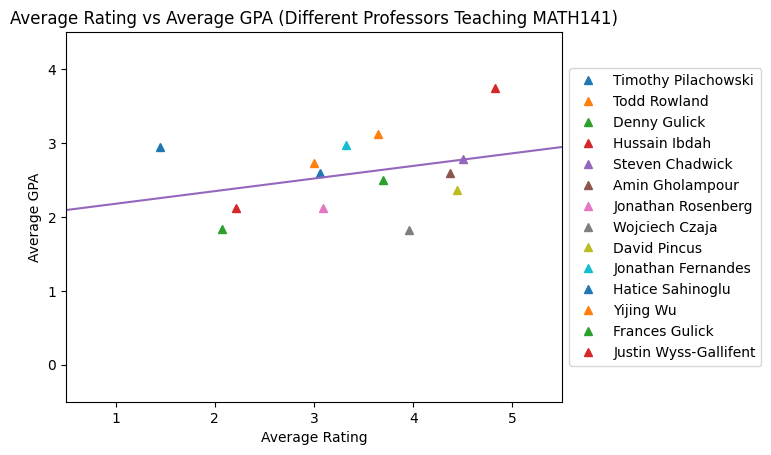

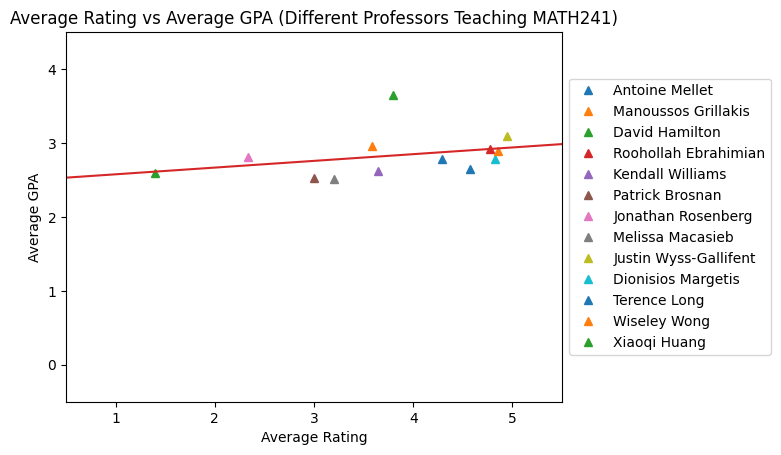

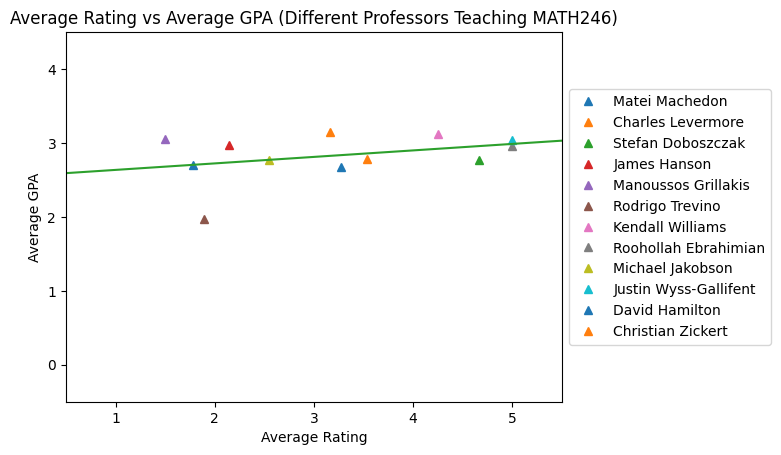

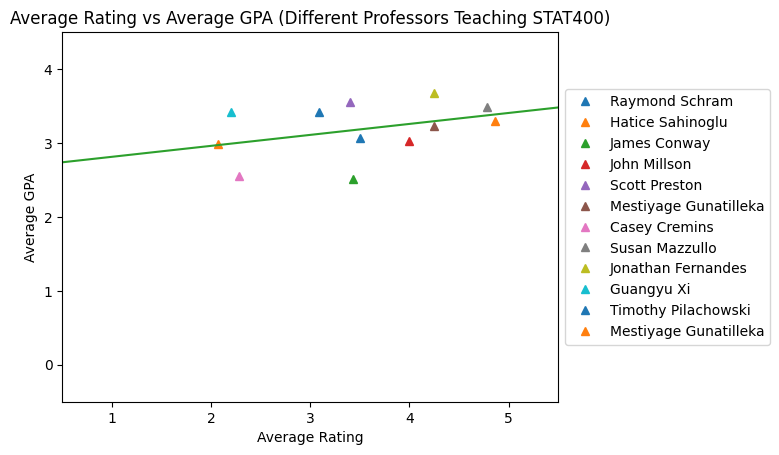

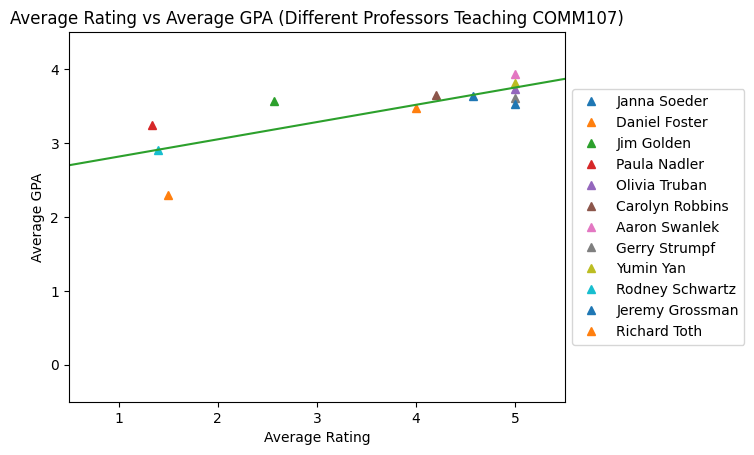

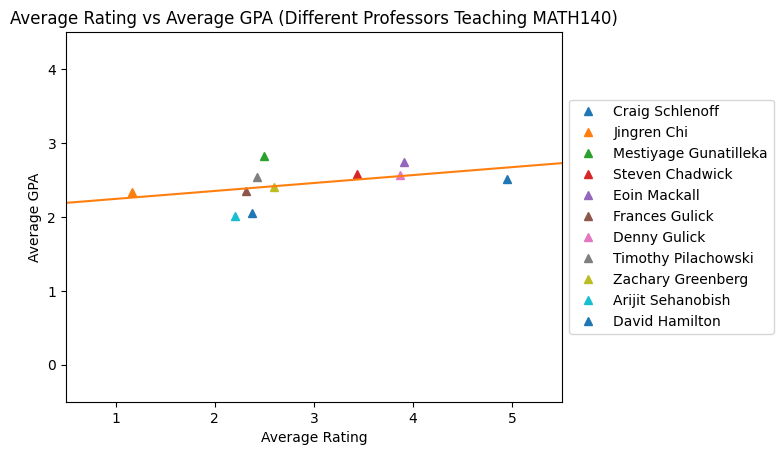

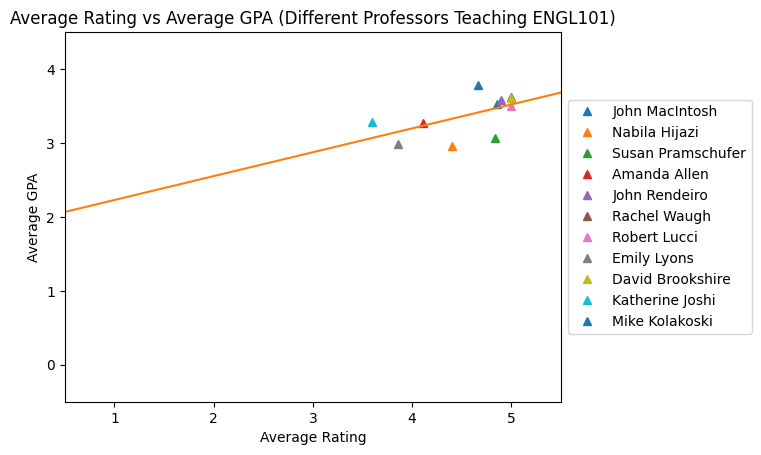

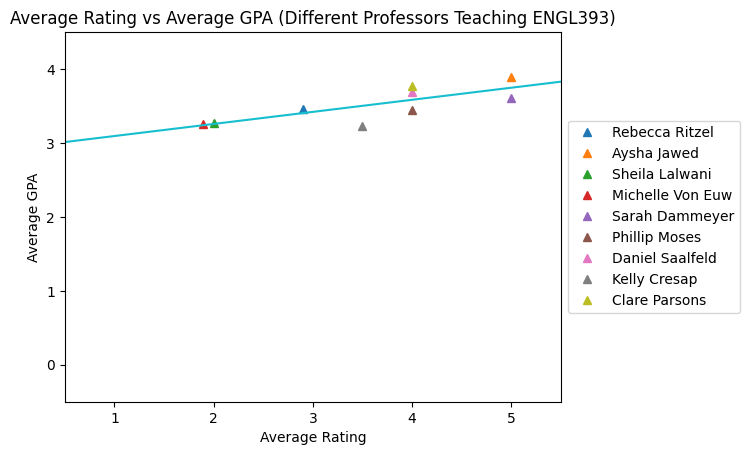

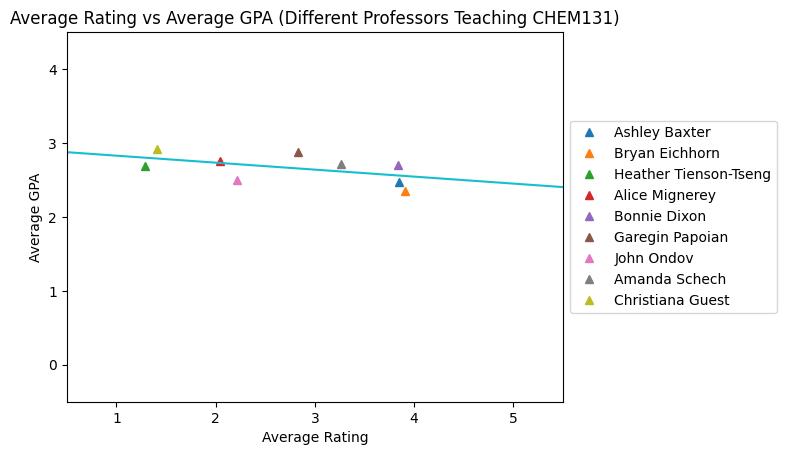

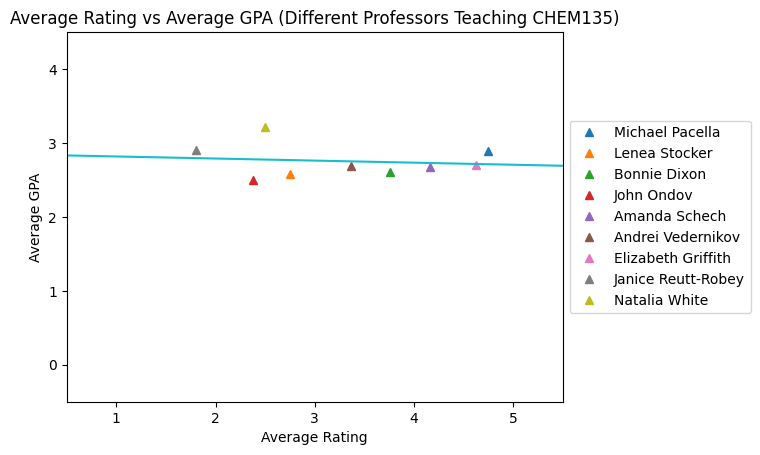

In [36]:
for i in most_profs_courses:
    profs = []
    ratings = []
    gpas = []

    for j in multi_course.get(i):
        profs.append(j[0])
        ratings.append(j[1])
        gpas.append(j[3])

    for j in range(len(profs)):
        plt.plot(ratings[j], gpas[j], "^", label = profs[j])

    plt.title("Average Rating vs Average GPA (Different Professors Teaching " + i + ")")
    plt.ylabel("Average GPA")
    plt.xlabel("Average Rating")
    plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
    ratings = np.array(ratings).reshape(-1, 1)
    reg = linear_model.LinearRegression()
    regfit = reg.fit(ratings, gpas)
    X = np.linspace(-100, 100)
    y_pred = reg.predict(np.array(X).reshape(-1,1))
    plt.plot(X,y_pred)
    plt.xlim(0.5, 5.5)
    plt.ylim(-0.5, 4.5)
    plt.show()